In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r'C:\Users\Karan Kumar\Desktop\Mimic3\train.csv')
df_test = pd.read_csv(r'C:\Users\Karan Kumar\Desktop\Mimic3\test.csv')
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [3]:
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [4]:
df_test.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [5]:
data = pd.concat([df, df_test], axis=0).reset_index(drop=True)
df['customer_category'].unique()

array([0, 1], dtype=int64)

In [6]:
df['X1'].unique()

array(['F', 'A', 'BA', 'AA', 'E', nan], dtype=object)

In [7]:
df['customer_active_segment'].unique()

array(['C', 'AA', 'B', 'A', 'D', nan], dtype=object)

In [8]:
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [10]:
df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


<AxesSubplot:xlabel='customer_category', ylabel='count'>

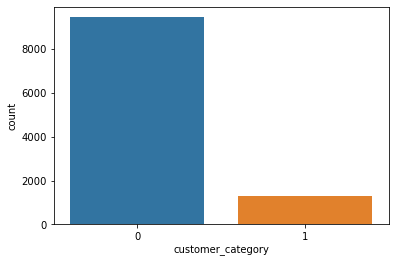

In [11]:
sns.countplot('customer_category',data=df )

C:\Users\Karan Kumar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Karan Kumar\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


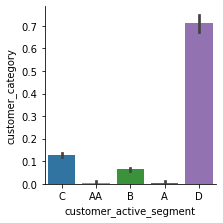

In [12]:
g = sns.factorplot(x="customer_active_segment", y ="customer_category", data=df, kind="bar", size=3)
plt.show()

C:\Users\Karan Kumar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Karan Kumar\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


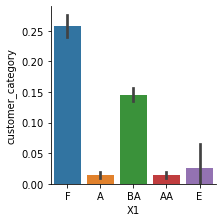

In [13]:
sns.factorplot(x="X1", y ="customer_category", data=data, kind="bar", size=3)
plt.show()

In [14]:
df.fillna(df.mean(), inplace=True)
df_test.fillna(df_test.mean(),inplace=True)
data.fillna(df_test.mean(),inplace=True)
df['customer_active_segment'].fillna(method='ffill',inplace=True)
df_test['customer_active_segment'].fillna(method='ffill',inplace=True)
data['customer_active_segment'].fillna(method='ffill',inplace=True)
df['X1'].fillna(method='ffill',inplace=True)
df_test['X1'].fillna(method='ffill',inplace=True)
data['X1'].fillna(method='ffill',inplace=True)

In [15]:
df.X1 = pd.Categorical(df.X1)
df['X1'] = df.X1.cat.codes
df.customer_active_segment = pd.Categorical(df.customer_active_segment)
df['customer_active_segment'] = df.customer_active_segment.cat.codes

df_test.X1 = pd.Categorical(df_test.X1)
df_test['X1'] = df_test.X1.cat.codes
df_test.customer_active_segment = pd.Categorical(df_test.customer_active_segment)
df_test['customer_active_segment'] = df_test.customer_active_segment.cat.codes

In [16]:
df_test.head(2)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1


In [17]:
df.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

In [18]:
df_test.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [19]:
zero = df[df['customer_category']==0].count()
zero_total = zero['customer_category']
ones = df[df['customer_category']==1].count()
ones_total = ones['customer_category']
print('Total_data of_category 0 =',zero_total)
print('Total_data of_category 1 =',ones_total)

Total_data of_category 0 = 9443
Total_data of_category 1 = 1295


Here, we find that there is a lot of difference between no of binary output values.Therefore,we will use resampling techniques.

<AxesSubplot:xlabel='customer_ctr_score', ylabel='customer_category'>

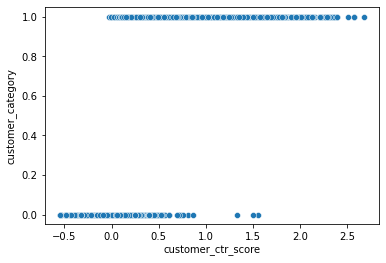

In [20]:
sns.scatterplot(x='customer_ctr_score',y='customer_category',data=df)

In [21]:
from sklearn.utils import resample
df_majority = df[df.customer_category==0]
df_minority = df[df.customer_category==1]

In [22]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=9443,random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.customer_category.value_counts()

1    9443
0    9443
Name: customer_category, dtype: int64

<AxesSubplot:>

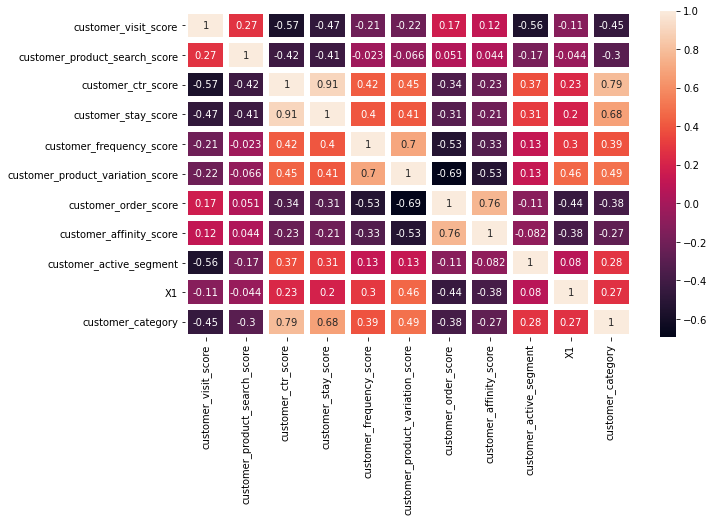

In [23]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidth=5)

# Feature Selection

Here,We will use wrapping and correlation techniques for Feature Selection.

In [24]:
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(['customer_id','customer_category'],axis=1)
y = df['customer_category']

In [25]:
sfs = SFS(LogisticRegression(),k_features=5,forward=True,floating=True,cv=0)
sfs.fit(X,y)
for_wrap = list(sfs.k_feature_names_)
for_wrap

['customer_visit_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_active_segment',
 'X1']

<AxesSubplot:>

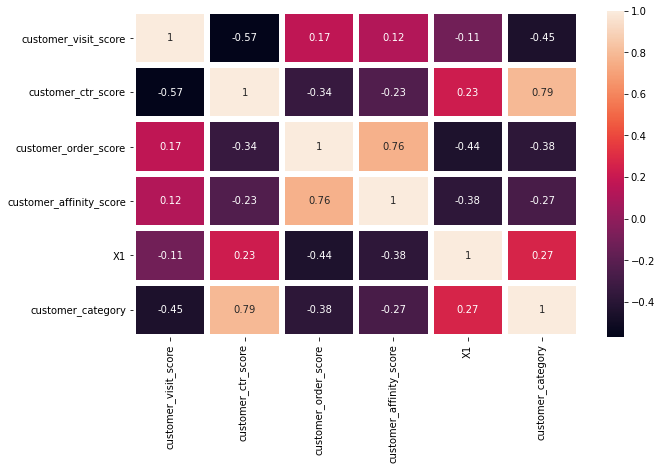

In [26]:
plt.subplots(figsize=(10,6))
nn = df[['customer_visit_score','customer_ctr_score','customer_order_score','customer_affinity_score','X1','customer_category']]
sns.heatmap(nn.corr(),annot=True,linewidth=5)

In [27]:
sfss = SFS(LogisticRegression(),k_features=5,forward=False,floating=False,scoring='r2',cv=0)
sfss.fit(X,y)
rev_wrap = list(sfss.k_feature_names_)
rev_wrap

C:\Users\Karan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Karan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

['customer_product_search_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_product_variation_score',
 'customer_order_score']

<AxesSubplot:>

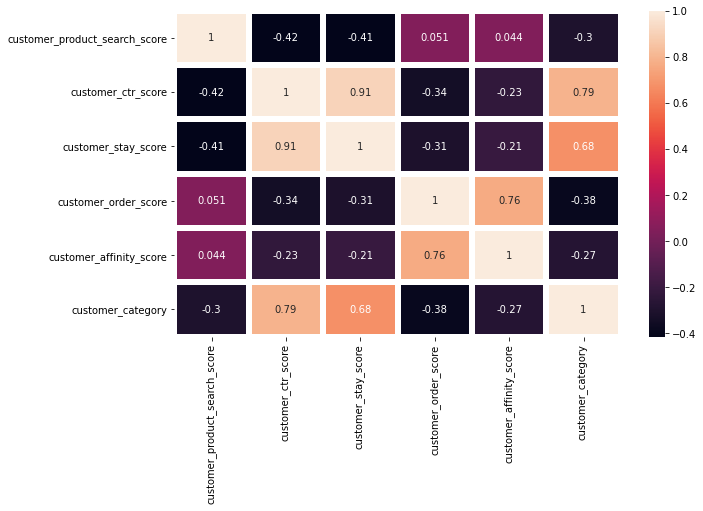

In [28]:
plt.subplots(figsize=(10,6))
nn1 = df[['customer_product_search_score','customer_ctr_score','customer_stay_score','customer_order_score','customer_affinity_score','customer_category']]
sns.heatmap(nn1.corr(),annot=True,linewidth=5)

In [29]:
sffs = SFS(LogisticRegression(),k_features=(4,11),forward=True,floating=True,cv=0)
sfss.fit(X,y)
mid_wrap = list(sfss.k_feature_names_)
mid_wrap

C:\Users\Karan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Karan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

['customer_product_search_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_product_variation_score',
 'customer_order_score']

<AxesSubplot:>

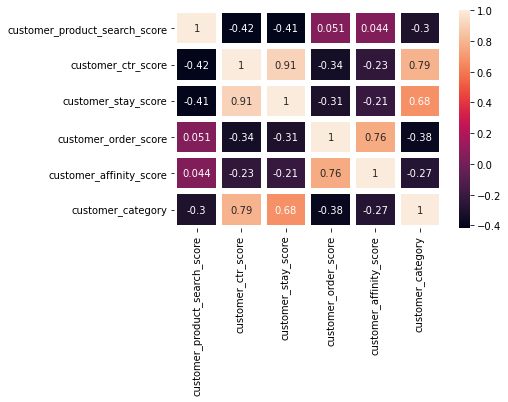

In [30]:
ns = df[['customer_product_search_score','customer_ctr_score','customer_stay_score','customer_order_score','customer_affinity_score','customer_category']]
sns.heatmap(ns.corr(),annot=True,linewidth=5)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

test = data[len(df):]
test.drop(labels="customer_category", axis=1, inplace=True)
test_data = test[['customer_ctr_score','customer_stay_score','customer_frequency_score',
       'customer_product_variation_score','customer_active_segment','X1']]

train = data[:len(df)]
train_data = df_upsampled[['customer_ctr_score','customer_stay_score','customer_frequency_score',
       'customer_product_variation_score','customer_active_segment','X1']]
y_train = df_upsampled["customer_category"]

X_train, X_test, y_train, y_test = train_test_split(train_data, df_upsampled["customer_category"], test_size=0.5, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Karan Kumar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now we will use different classification algorithms and choose the one that gives best accuracy and precision score for getting prediction on test set.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

dtree  = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = dtree.predict(X_test)
predict = dtree.predict(X_train)
d_accuracy = dtree.score(X_test, y_test)*100

t = precision_score(y_test, predictions, average='macro')
d_train_acc = dtree.score(X_train, y_train)
d_test_acc = dtree.score(X_test,y_test)
d_training_error = mean_squared_error(y_train,predictions)
d_testing_error = mean_squared_error(y_test,predict)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('Accuracy=',d_accuracy)
print("Train Accuracy: ", dtree.score(X_train, y_train))
print("Test Accuracy: ", dtree.score(X_test,y_test))
print('Precision Score =',t)
print('Training Error =',d_training_error)
print('Testing Error =',d_testing_error)

[[4535  216]
 [  25 4667]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4751
           1       0.96      0.99      0.97      4692

    accuracy                           0.97      9443
   macro avg       0.98      0.97      0.97      9443
weighted avg       0.98      0.97      0.97      9443

Accuracy= 97.447844964524
Train Accuracy:  1.0
Test Accuracy:  0.9744784496452399
Precision Score = 0.9751412212437709
Training Error = 0.4958170073069999
Testing Error = 0.49571110875781


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
r_predictions = rfc.predict(X_test)
r_predict = rfc.predict(X_train)

t_rfc = precision_score(y_test, r_predictions, average='macro')
r_train_acc = rfc.score(X_train, y_train)
r_test_acc = rfc.score(X_test,y_test)
r_training_error = mean_squared_error(y_train,r_predict)
r_testing_error = mean_squared_error(y_test,r_predictions)

print(confusion_matrix(y_test,r_predictions))
print(classification_report(y_test,r_predictions))
r_accuracy = rfc.score(X_test, y_test)*100
print('Accuracy',r_accuracy)
print("Train Accuracy: ", rfc.score(X_train, y_train))
print("Test Accuracy: ", rfc.score(X_test,y_test))
print('Precision Score =',t_rfc)
print('Training Error =',r_training_error)
print('Testing Error =',r_testing_error)

[[4675   76]
 [  17 4675]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4751
           1       0.98      1.00      0.99      4692

    accuracy                           0.99      9443
   macro avg       0.99      0.99      0.99      9443
weighted avg       0.99      0.99      0.99      9443

Accuracy 99.01514349253415
Train Accuracy:  1.0
Test Accuracy:  0.9901514349253415
Precision Score = 0.9901900896531317
Training Error = 0.0
Testing Error = 0.009848565074658477


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
lr_pred = lr.predict(X_test)
lr_predict = lr.predict(X_train)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
lr_accuracy = lr.score(X_test, y_test)*100
t_lr = precision_score(y_test, lr_pred, average='macro')
l_train_acc = lr.score(X_train, y_train)
l_test_acc = lr.score(X_test,y_test)
l_training_error = mean_squared_error(y_train,lr_predict)
l_testing_error = mean_squared_error(y_test,lr_pred)

print('Accuracy =',lr_accuracy)
print("Train Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test,y_test))
print('Precision Score =',t_lr)
print('Training Error =',l_training_error)
print('Testing Error =',l_testing_error)

[[4623  128]
 [ 429 4263]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4751
           1       0.97      0.91      0.94      4692

    accuracy                           0.94      9443
   macro avg       0.94      0.94      0.94      9443
weighted avg       0.94      0.94      0.94      9443

Accuracy = 94.1014508101239
Train Accuracy:  0.9361431748385047
Test Accuracy:  0.941014508101239
Precision Score = 0.9429663001031585
Training Error = 0.06385682516149528
Testing Error = 0.05898549189876099


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [39]:
s_pred = svc.predict(X_test)
s_predict = svc.predict(X_train)

s_accuracy = svc.score(X_test, y_test)*100
t_svc = precision_score(y_test, s_pred, average='macro')
s_test_acc = svc.score(X_test,y_test)
s_train_acc = svc.score(X_train, y_train)
s_training_error = mean_squared_error(y_train,s_predict)
s_testing_error = mean_squared_error(y_test,s_pred)

print(confusion_matrix(y_test,s_pred))
print(classification_report(y_test,s_pred))

print('Accuracy =',s_accuracy)
print("Train Accuracy: ", svc.score(X_train, y_train))
print("Test Accuracy: ", svc.score(X_test,y_test))
print('Precision Score =',t_svc)
print('Training Error =',s_training_error)
print('Testing Error =',s_testing_error)

[[4649  102]
 [ 448 4244]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4751
           1       0.98      0.90      0.94      4692

    accuracy                           0.94      9443
   macro avg       0.94      0.94      0.94      9443
weighted avg       0.94      0.94      0.94      9443

Accuracy = 94.17557979455682
Train Accuracy:  0.9374139574287832
Test Accuracy:  0.9417557979455682
Precision Score = 0.9443176512789482
Training Error = 0.06258604257121678
Testing Error = 0.05824420205443186


In [40]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn

[0.980302869850683,
 0.9759610293338982,
 0.9646298845705814,
 0.9574287832256698,
 0.9508630731758975,
 0.9476861167002012,
 0.9413322037488087,
 0.9395319284125807,
 0.9357195806417452,
 0.9364608704860743,
 0.9329662183628085]

In [41]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
knn_pred = knn.predict(X_test)
knn_predict = knn.predict(X_train)

kn_accuracy = knn.score(X_test, y_test)*100
t_kn = precision_score(y_test, knn_pred, average='macro')
k_train_acc = knn.score(X_train, y_train)
k_test_acc = knn.score(X_test,y_test)
k_training_error = mean_squared_error(y_train,knn_predict)
k_testing_error = mean_squared_error(y_test,knn_pred)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print('Accuracy =',kn_accuracy)
print("Train Accuracy: ", knn.score(X_train, y_train))
print("Test Accuracy: ", knn.score(X_test,y_test))
print('Precision Score =',t_kn)
print('Training Error =',k_training_error)
print('Testing Error =',k_testing_error)

[[4587  164]
 [  22 4670]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4751
           1       0.97      1.00      0.98      4692

    accuracy                           0.98      9443
   macro avg       0.98      0.98      0.98      9443
weighted avg       0.98      0.98      0.98      9443

Accuracy = 98.0302869850683
Train Accuracy:  1.0
Test Accuracy:  0.980302869850683
Precision Score = 0.9806501876623717
Training Error = 0.0
Testing Error = 0.019697130149316955


In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [44]:
nb_pred = nb.predict(X_test)
nb_predict = nb.predict(X_train)

nb_accuracy = nb.score(X_test, y_test)*100
t_nb = precision_score(y_test, nb_pred, average='macro')
nb_train_acc = nb.score(X_train, y_train)
nb_test_acc = nb.score(X_test,y_test)
nb_training_error = mean_squared_error(y_train,nb_predict)
nb_testing_error = mean_squared_error(y_test,nb_pred)

print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
print('Accuracy =',nb_accuracy)
print("Train Accuracy: ", nb.score(X_train, y_train))
print("Test Accuracy: ", nb.score(X_test,y_test))
print('Precision Score =',t_nb)
print('Training Error =',nb_training_error)
print('Testing Error =',nb_testing_error)

[[4519  232]
 [ 701 3991]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4751
           1       0.95      0.85      0.90      4692

    accuracy                           0.90      9443
   macro avg       0.91      0.90      0.90      9443
weighted avg       0.91      0.90      0.90      9443

Accuracy = 90.11966536058455
Train Accuracy:  0.8996081753679974
Test Accuracy:  0.9011966536058456
Precision Score = 0.9053857819294631
Training Error = 0.10039182463200254
Testing Error = 0.0988033463941544


In [45]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X_train,y_train)

KMeans(n_clusters=2)

In [46]:
kmean.labels_

array([1, 1, 1, ..., 1, 1, 0])

Cluster 1 Inertia 56657.999999999876
Cluster 2 Inertia 32216.947982591315
Cluster 3 Inertia 25682.902610998568
Cluster 4 Inertia 22340.073349739207
Cluster 5 Inertia 19772.552968196076
Cluster 6 Inertia 17760.781398196494
Cluster 7 Inertia 16498.174926944197
Cluster 8 Inertia 15084.516081325715
Cluster 9 Inertia 14196.625778878784
Cluster 10 Inertia 13294.38793519904
Cluster 11 Inertia 12532.714944362438
Cluster 12 Inertia 11857.575672730829
Cluster 13 Inertia 11234.226985340389
Cluster 14 Inertia 10692.96290506967
Cluster 15 Inertia 10104.636943385432
Cluster 16 Inertia 9733.003373791511
Cluster 17 Inertia 9396.80651269811
Cluster 18 Inertia 9116.47349283729
Cluster 19 Inertia 8715.176705998356


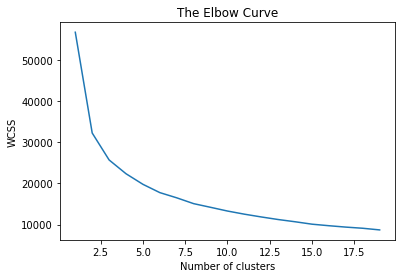

In [47]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,random_state=0)
    kmeans.fit(X_train,y_train)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

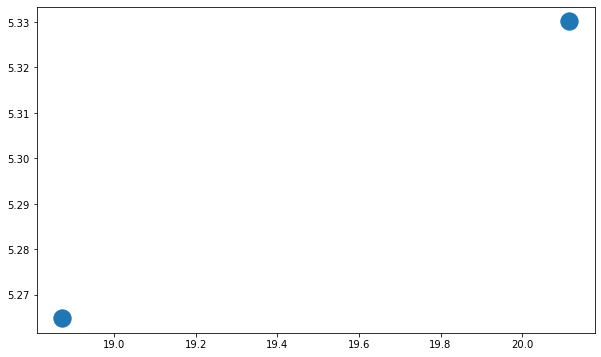

In [48]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

plt.subplots(figsize=(10,6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 300,cmap = 'summer')
plt.show()

In [49]:
result = {'Model_Name':['Logistic_Regression','Decision_Tree','Random_forest_classifier','KNN','SVM','Naive_Bayes'],
         'Accuracy':[lr_accuracy,d_accuracy,r_accuracy,kn_accuracy,s_accuracy,nb_accuracy],
         'Train_Accuracy':[l_train_acc,d_train_acc,r_train_acc,k_train_acc,s_train_acc,nb_train_acc],
         'Test_Accuracy':[l_test_acc,d_test_acc,r_test_acc,k_test_acc,s_test_acc,nb_test_acc],
         'Precision Score':[t_lr,t,t_rfc,t_kn,t_svc,t_nb],
         'Training_Error':[l_training_error,d_training_error,r_training_error,k_training_error,s_training_error,nb_training_error],
         'Testing_Error':[l_testing_error,d_testing_error,r_testing_error,k_testing_error,s_testing_error,nb_testing_error]}
performance_repo = pd.DataFrame(result)
performance_repo

,Model_Name,Accuracy,Train_Accuracy,Test_Accuracy,Precision Score,Training_Error,Testing_Error
0,Logistic_Regression,94.101451,0.936143,0.941015,0.942966,0.063857,0.058985
1,Decision_Tree,97.447845,1.000000,0.974478,0.975141,0.495817,0.495711
2,Random_forest_classifier,99.015143,1.000000,0.990151,0.990190,0.000000,0.009849
3,KNN,98.030287,1.000000,0.980303,0.980650,0.000000,0.019697
4,SVM,94.175580,0.937414,0.941756,0.944318,0.062586,0.058244
5,Naive_Bayes,90.119665,0.899608,0.901197,0.905386,0.100392,0.098803


# Examining Model's Performances

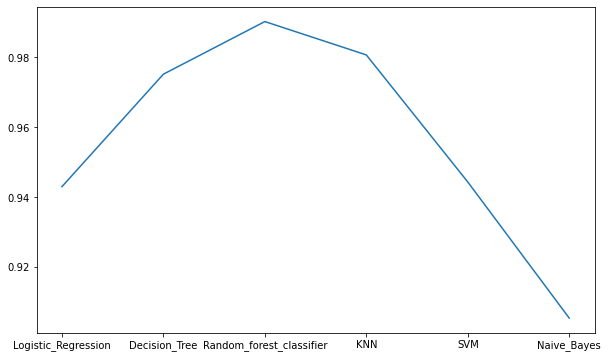

In [50]:
plt.subplots(figsize=(10,6))
plt.plot(performance_repo['Model_Name'],performance_repo['Precision Score'])

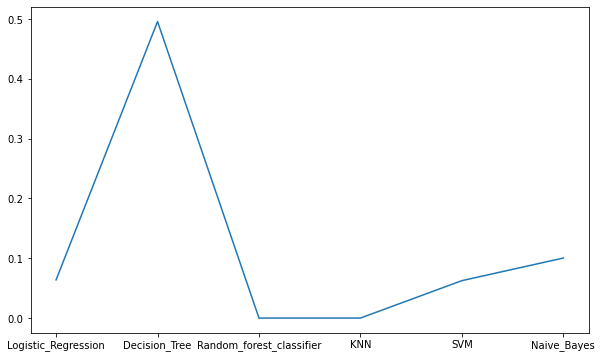

In [51]:
plt.subplots(figsize=(10,6))
plt.plot(performance_repo['Model_Name'],performance_repo['Training_Error'])

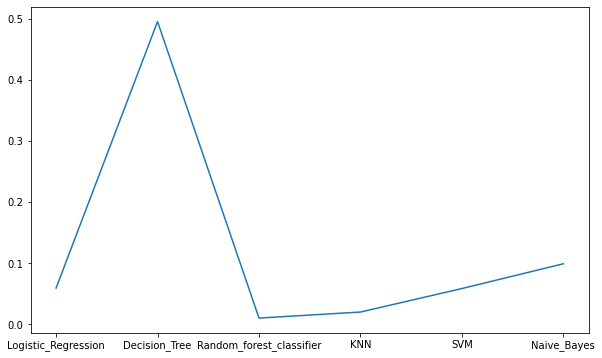

In [52]:
plt.subplots(figsize=(10,6))
plt.plot(performance_repo['Model_Name'],performance_repo['Testing_Error'])

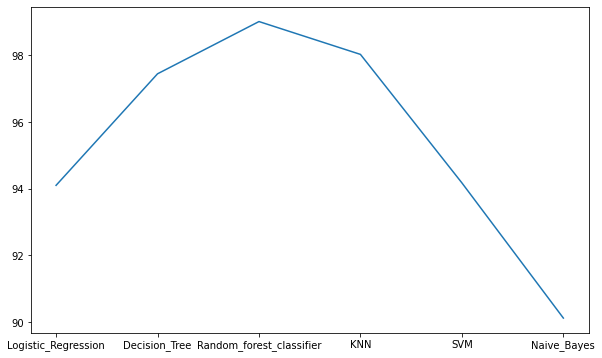

In [53]:
plt.subplots(figsize=(10,6))
plt.plot(performance_repo['Model_Name'],performance_repo['Accuracy'])

From the above Performance report we find that Random Forest Classifier has performed better than any other algorithm.Therefore, we will use Random forest classifier for generating Final prediction on test data.

# Final Prediction_File

In [54]:
df_test.X1 = pd.Categorical(df_test.X1)
df_test['X1'] = df_test.X1.cat.codes
df_test.customer_active_segment = pd.Categorical(df_test.customer_active_segment)
df_test['customer_active_segment'] = df_test.customer_active_segment.cat.codes

df_test.head(5)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2


In [55]:
test_data.X1 = pd.Categorical(test_data.X1)
test_data['X1'] = test_data.X1.cat.codes
test_data.customer_active_segment = pd.Categorical(test_data.customer_active_segment)
test_data['customer_active_segment'] = test_data.customer_active_segment.cat.codes

test_data.head()

C:\Users\Karan Kumar\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-55-bb4e148db8f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['X1'] = test_data.X1.cat.codes
<ipython-input-55-bb4e148db8f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_active_segment,X1
10738,0.118811,0.093253,0.689237,5.786842,2,2
10739,0.130985,0.053575,0.142756,3.940359,2,1
10740,-0.004651,-0.036299,0.333709,4.254662,2,1
10741,0.229740,0.204591,3.768405,6.942625,2,2
10742,-0.011347,-0.028780,0.286841,4.585513,3,2


In [76]:
final_df = df_test.copy()
test_pre = rfc.predict(test_data)

In [77]:
file = 'Results.csv'

submission = pd.DataFrame({'customer_id':final_df['customer_id'],
                           'customer_category':test_pre})
submission.to_csv(file,index=False)
print('Saved_file: '+ file)

Saved_file: Results.csv


In [78]:
pd.read_csv('Results.csv')

,customer_id,customer_category
0,csid_10739,1
1,csid_10740,1
2,csid_10741,1
3,csid_10742,1
4,csid_10743,1
...,...,...
7155,csid_17894,1
7156,csid_17895,1
7157,csid_17896,1
7158,csid_17897,1
